In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from ODEsolver import ODEsolver
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.layers import Dense, Dropout

Model: "od_esolver_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 2         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
4/4 [==============================] - 0s 1ms/step - loss: 6.1600
Epoch 2/500
4/4 [==============================] - 0s 1ms/step - loss: 4.6416
Epoch 3/500
4/4 [==============================] - 0s 2ms/step - loss: 5.7437
Epoch 4/500
4/4 [==============================] - 0s 1ms/step - loss: 4.7194
Epoch 5/500
4/4 [==============================] - 0s 2ms/step - loss: 5.715

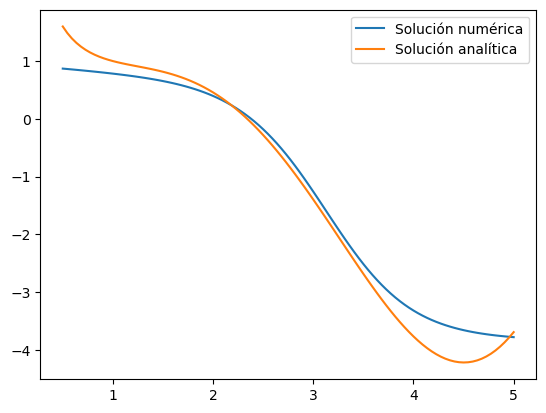

In [4]:
# Se propuso otra condición inicial y otro intervalo pues la solución de la ecuación 
# diferencial se indetermina cuando x=0

minval=0.5
maxval = 5
model = ODEsolver(funcion="dy - x*tf.math.cos(x)+(y_pred/x)",ic=1, minval=minval, maxval=maxval)

model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(1, activation='tanh'))
model.add(Dense(1, activation='linear'))

model.summary()

model.compile(optimizer=RMSprop(), metrics=['loss'])

x = tf.linspace(minval,maxval,100)
history = model.fit(x, epochs=500, verbose=1)

a = model.predict(x)
plt.plot(x,a, label="Solución numérica")
plt.plot(x, (0.7608663731/x)+x*np.sin(x)-((2*np.sin(x))/x)+2*np.cos(x),label="Solución analítica")
plt.legend()
plt.show()


Model: "od_esolver_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 11        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 2         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
4/4 [==============================] - 0s 1000us/step - loss: 1.2966
Epoch 2/500
4/4 [==============================] - 0s 1ms/step - loss: 1.1637
Epoch 3/500
4/4 [==============================] - 0s 2ms/step - loss: 1.1080
Epoch 4/500
4/4 [==============================] - 0s 2ms/step - loss: 1.0453
Epoch 5/500
4/4 [==============================] - 0s 1ms/step - loss: 1.

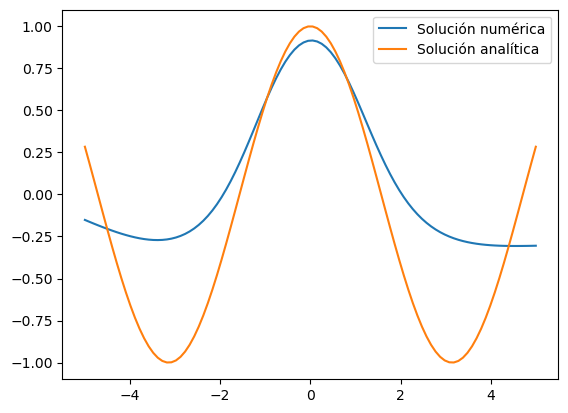

In [5]:
minval = -5
maxval = 5
model = ODEsolver(funcion="dy2+y_pred",ic=1, minval=minval, maxval=maxval)

model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(1, activation='tanh'))
model.add(Dense(1, activation='linear'))

model.summary()

model.compile(optimizer=RMSprop(), metrics=['loss'])

x = tf.linspace(minval,maxval,100)
history = model.fit(x, epochs=500, verbose=1)

a = model.predict(x)
plt.plot(x,a,label="Solución numérica")
plt.plot(x, np.cos(x),label="Solución analítica")
plt.legend()
plt.show()